In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
url_gca = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'
url_possession = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,825,1095,...,170,44.7,1,0.9,+0.1,13,39,29,7,79
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,921,1117,...,208,64.4,0,0.2,-0.2,6,57,4,0,58
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1322,1435,...,187,85.0,0,0.9,-0.9,10,61,5,0,56
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,944,1158,...,221,67.0,2,2.0,0.0,17,89,15,6,88
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,769,897,...,139,71.9,1,0.4,+0.6,9,67,7,1,61
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,537,653,...,66,68.2,1,1.2,-0.2,18,42,16,2,53
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,822,982,...,145,66.2,3,4.2,-1.2,44,53,43,2,103
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,236,392,...,5,80.0,2,1.4,+0.6,11,16,1,0,17


In [5]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,0,10,...,0.00,20.1,0,0,0,0.6,0.6,0.06,-0.6,-0.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,1,15,...,0.25,19.7,0,0,0,1.0,1.0,0.07,0.0,0.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,0,15,...,0.00,19.0,0,0,0,0.7,0.7,0.05,-0.7,-0.7
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,0,22,...,0.00,22.2,0,0,0,1.8,1.8,0.08,-1.8,-1.8
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,0,9,...,0.00,19.4,0,0,0,0.6,0.6,0.06,-0.6,-0.6
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,5,38,...,0.33,18.7,0,0,0,3.6,3.6,0.10,+1.4,+1.4
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,5,28,...,0.42,19.5,8,0,0,2.8,2.8,0.10,+2.2,+2.2
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,3,27,...,0.20,10.2,0,1,1,4.1,3.4,0.13,-1.1,-1.4


In [6]:
data_gca = pd.read_html(url_gca, header=1)[0]
data_gca = data_gca[data_gca['Player'] != 'Player']
data_gca = data_gca.drop(columns=['Rk', 'Matches'])
data_gca

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,...,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,29,1.18,...,1,0,4,0.16,4,0,0,0,0,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,15,0.65,...,0,2,0,0.00,0,0,0,0,0,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,32,1.40,...,4,2,0,0.00,0,0,0,0,0,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,37,1.59,...,5,3,3,0.13,2,0,0,0,1,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0,0.00,...,0,0,0,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,24,1.31,...,4,3,1,0.05,1,0,0,0,0,0
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,52,2.95,...,4,0,3,0.17,2,0,0,1,0,0
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,82,4.49,...,2,0,11,0.60,11,0,0,0,0,0
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,24,1.74,...,2,0,5,0.36,3,0,0,1,1,0


In [7]:
data_poss = pd.read_html(url_possession, header=1)[0]
data_poss = data_poss[data_poss['Player'] != 'Player']
data_poss = data_poss.drop(columns=['Rk', 'Matches'])
data_poss

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,Def Pen,...,PrgDist,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,1417,123,...,2897,127,40,10,19,24,866,782,90.3,32
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,1360,175,...,2694,68,19,0,11,9,881,862,97.8,9
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1646,54,...,2433,58,15,4,17,36,1392,1290,92.7,43
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,1435,20,...,2055,73,25,2,19,37,1062,998,94.0,44
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,12,0,...,9,0,1,0,4,0,12,8,66.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,1073,61,...,1901,66,19,0,14,7,754,731,96.9,17
2897,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,948,40,...,2875,128,50,4,33,43,732,624,85.2,65
2898,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,1141,10,...,2022,118,40,6,28,30,967,844,87.3,78
2899,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,530,24,...,189,11,3,4,33,16,699,429,61.4,66


In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
data_gca.iloc[:, 7:] = data_gca.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)
data_poss.iloc[:, 7:] = data_poss.iloc[:, 7:].astype(float)

In [10]:
data_gca = data_gca.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_poss = data_poss.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [11]:
player_data = pd.merge(data_shooting, data_gca, on="Player")
player_data = player_data.drop_duplicates(subset='Player')
player_data = pd.merge(player_data, data_passing, on='Player')
player_data = player_data.drop_duplicates(subset='Player')
player_data = pd.merge(player_data, data_poss, on='Player')
player_data = player_data.drop_duplicates(subset='Player')
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh_x,...,PrgDist_y,Prog_y,1/3_y,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,0.0,10.0,...,2897.0,127.0,40.0,10.0,19.0,24.0,866.0,782.0,90.3,32.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,1.0,15.0,...,2694.0,68.0,19.0,0.0,11.0,9.0,881.0,862.0,97.8,9.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,0.0,15.0,...,2433.0,58.0,15.0,4.0,17.0,36.0,1392.0,1290.0,92.7,43.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,0.0,22.0,...,2055.0,73.0,25.0,2.0,19.0,37.0,1062.0,998.0,94.0,44.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0.0,0.0,...,9.0,0.0,1.0,0.0,4.0,0.0,12.0,8.0,66.7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,0.0,9.0,...,1901.0,66.0,19.0,0.0,14.0,7.0,754.0,731.0,96.9,17.0
2786,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,5.0,38.0,...,2875.0,128.0,50.0,4.0,33.0,43.0,732.0,624.0,85.2,65.0
2787,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,5.0,28.0,...,2022.0,118.0,40.0,6.0,28.0,30.0,967.0,844.0,87.3,78.0
2788,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,3.0,27.0,...,189.0,11.0,3.0,4.0,33.0,16.0,699.0,429.0,61.4,66.0


C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

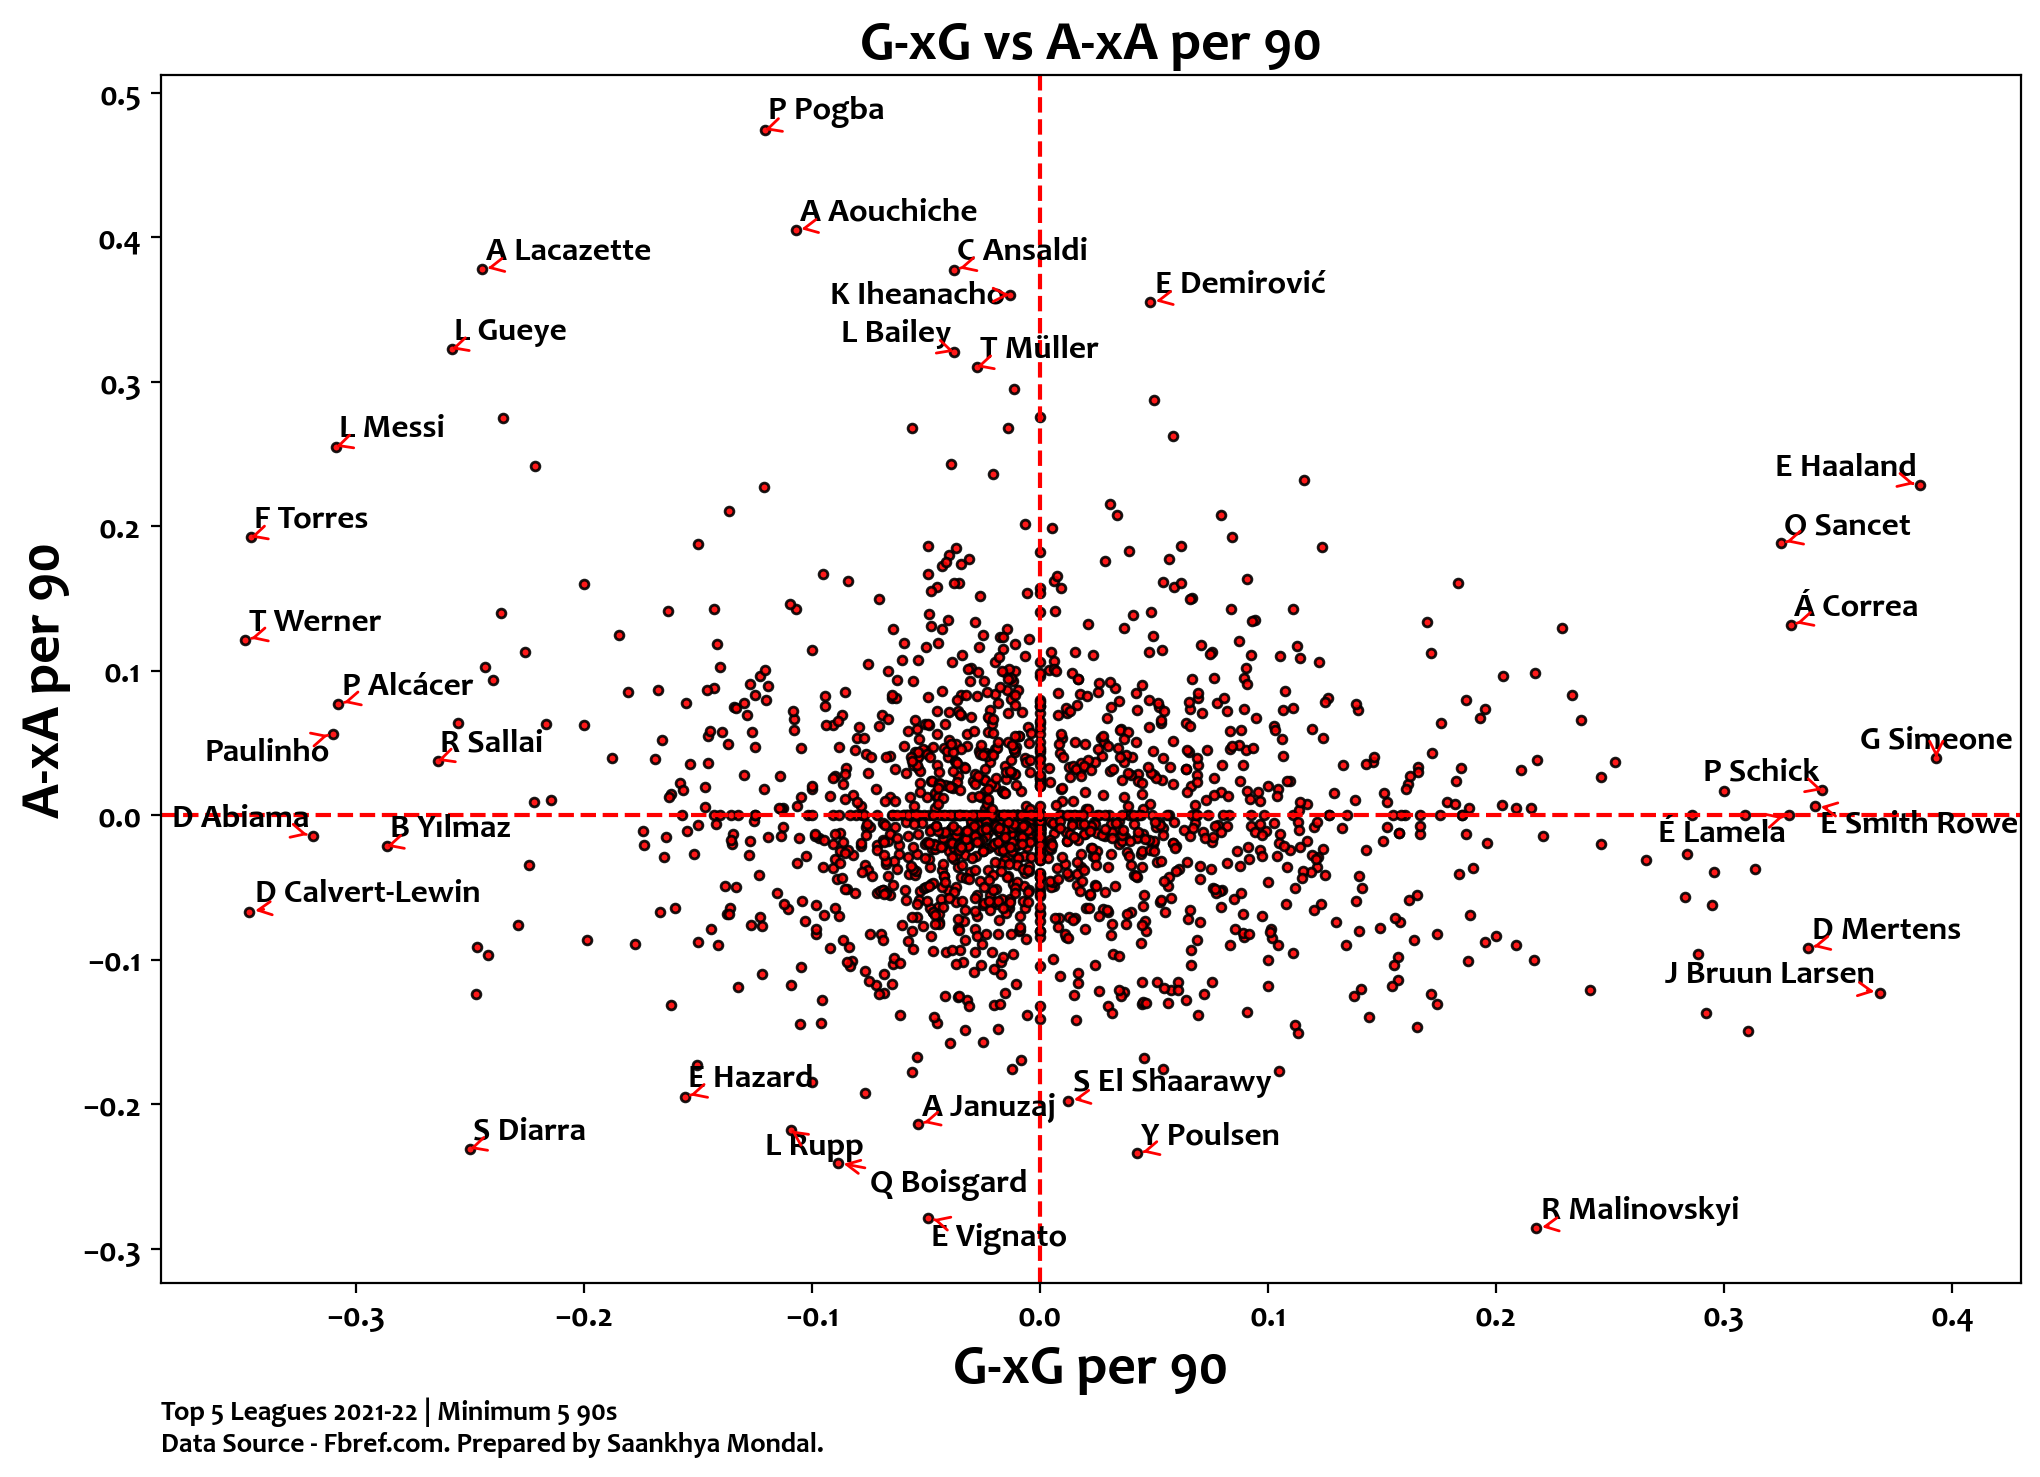

In [12]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['A-xAp90'] = data['A-xA']/data['90s']
data['G-xGp90'] = data['G-xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

ax.axhline(0, ls='--', lw=1.5, color='red')
ax.axvline(0, ls='--', lw=1.5, color='red')

outlier_top = data['A-xAp90'].quantile(0.995)
outlier_bottom = data['A-xAp90'].quantile(0.005)
outlier_right = data['G-xGp90'].quantile(0.995)
outlier_left = data['G-xGp90'].quantile(0.005)

par_x = list(data['G-xGp90'].astype(float))
par_y = list(data['A-xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))


ax.set_xlabel('G-xG per 90', fontsize=20)
ax.set_ylabel('A-xA per 90', fontsize=20)
ax.set_title('G-xG vs A-xA per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [15]:
player_data = player_data[player_data['Pos'].str.contains('FW')]
player_data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh_x,...,PrgDist_y,Prog_y,1/3_y,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0.0,0.0,...,9.0,0.0,1.0,0.0,4.0,0.0,12.0,8.0,66.7,2.0
5,Dickson Abiama,ng NGA,FW,Greuther Fürth,de Bundesliga,23-124,1998,6.9,0.0,18.0,...,271.0,18.0,8.0,6.0,30.0,10.0,286.0,140.0,49.0,44.0
6,Matthis Abline,fr FRA,FW,Rennes,fr Ligue 1,18-344,2003,1.1,0.0,2.0,...,35.0,3.0,0.0,0.0,2.0,5.0,39.0,13.0,33.3,8.0
7,Tammy Abraham,eng ENG,FW,Roma,it Serie A,24-156,1997,25.5,13.0,78.0,...,1058.0,67.0,22.0,19.0,65.0,35.0,1080.0,595.0,55.1,182.0
10,Ragnar Ache,de GER,"FW,MF",Eint Frankfurt,de Bundesliga,23-222,1998,1.4,0.0,8.0,...,165.0,10.0,3.0,5.0,7.0,4.0,105.0,64.0,61.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,Andi Zeqiri,ch SUI,"FW,MF",Augsburg,de Bundesliga,22-258,1999,10.3,2.0,28.0,...,291.0,15.0,4.0,5.0,30.0,19.0,408.0,195.0,47.8,57.0
2778,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,eng Premier League,28-353,1993,9.7,4.0,39.0,...,1064.0,61.0,19.0,14.0,17.0,27.0,527.0,428.0,81.2,83.0
2780,Simon Zoller,de GER,FW,Bochum,de Bundesliga,30-254,1991,4.0,2.0,5.0,...,171.0,6.0,2.0,0.0,8.0,0.0,133.0,78.0,58.6,10.0
2788,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,3.0,27.0,...,189.0,11.0,3.0,4.0,33.0,16.0,699.0,429.0,61.4,66.0


C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

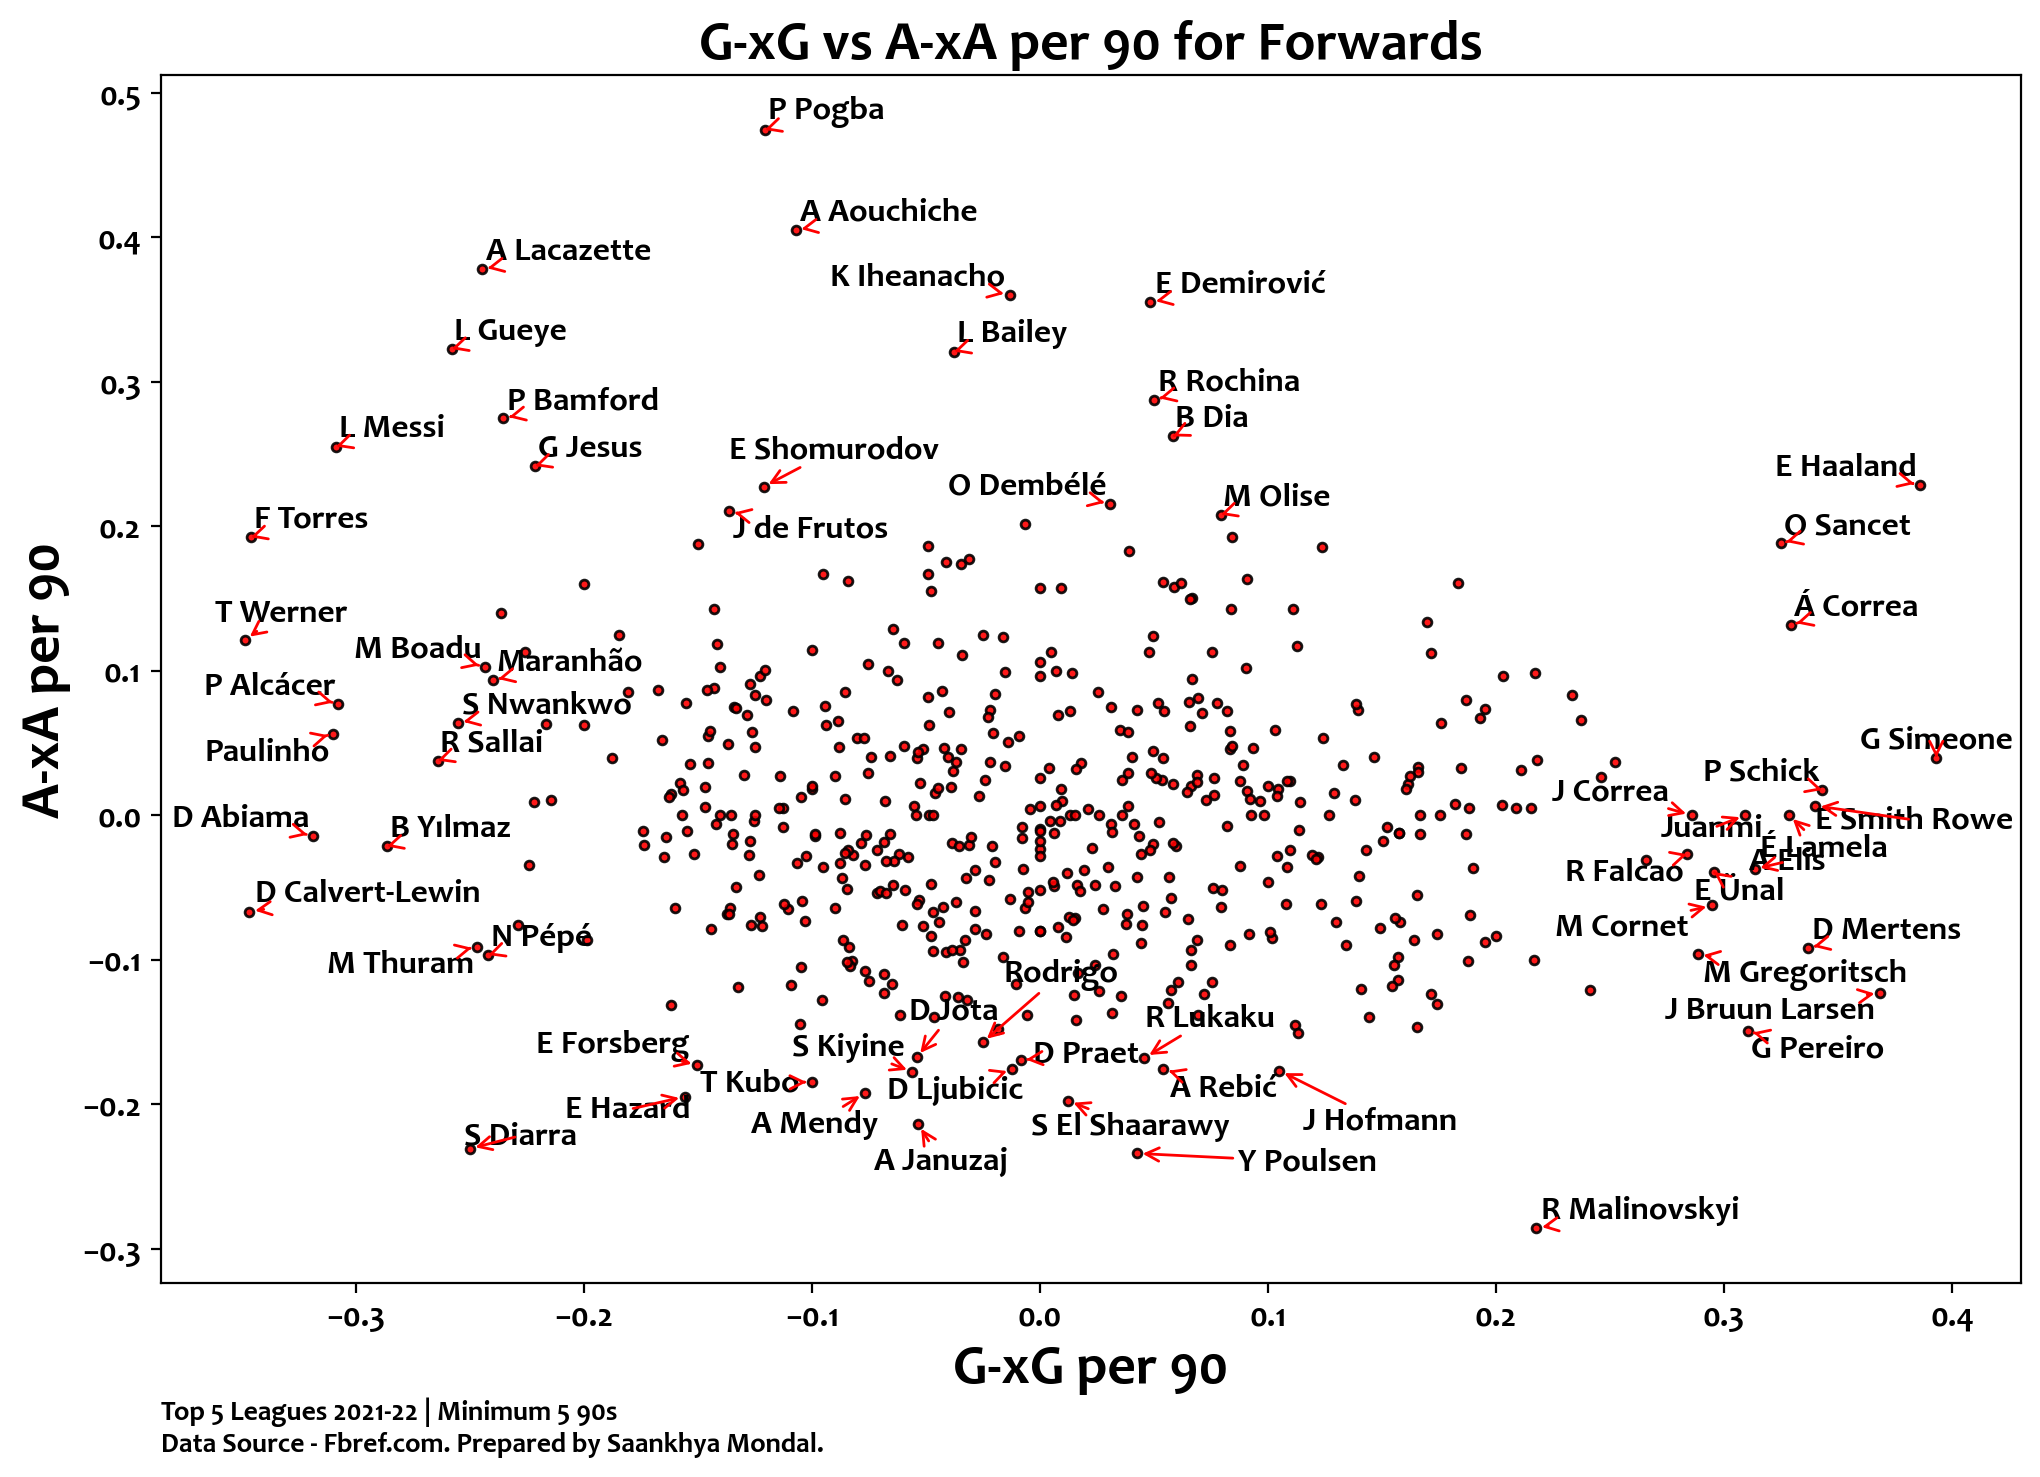

In [16]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['A-xAp90'] = data['A-xA']/data['90s']
data['G-xGp90'] = data['G-xG']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['A-xAp90'].quantile(0.970)
outlier_bottom = data['A-xAp90'].quantile(0.03)
outlier_right = data['G-xGp90'].quantile(0.970)
outlier_left = data['G-xGp90'].quantile(0.03)

par_x = list(data['G-xGp90'].astype(float))
par_y = list(data['A-xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('G-xG per 90', fontsize=20)
ax.set_ylabel('A-xA per 90', fontsize=20)
ax.set_title('G-xG vs A-xA per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

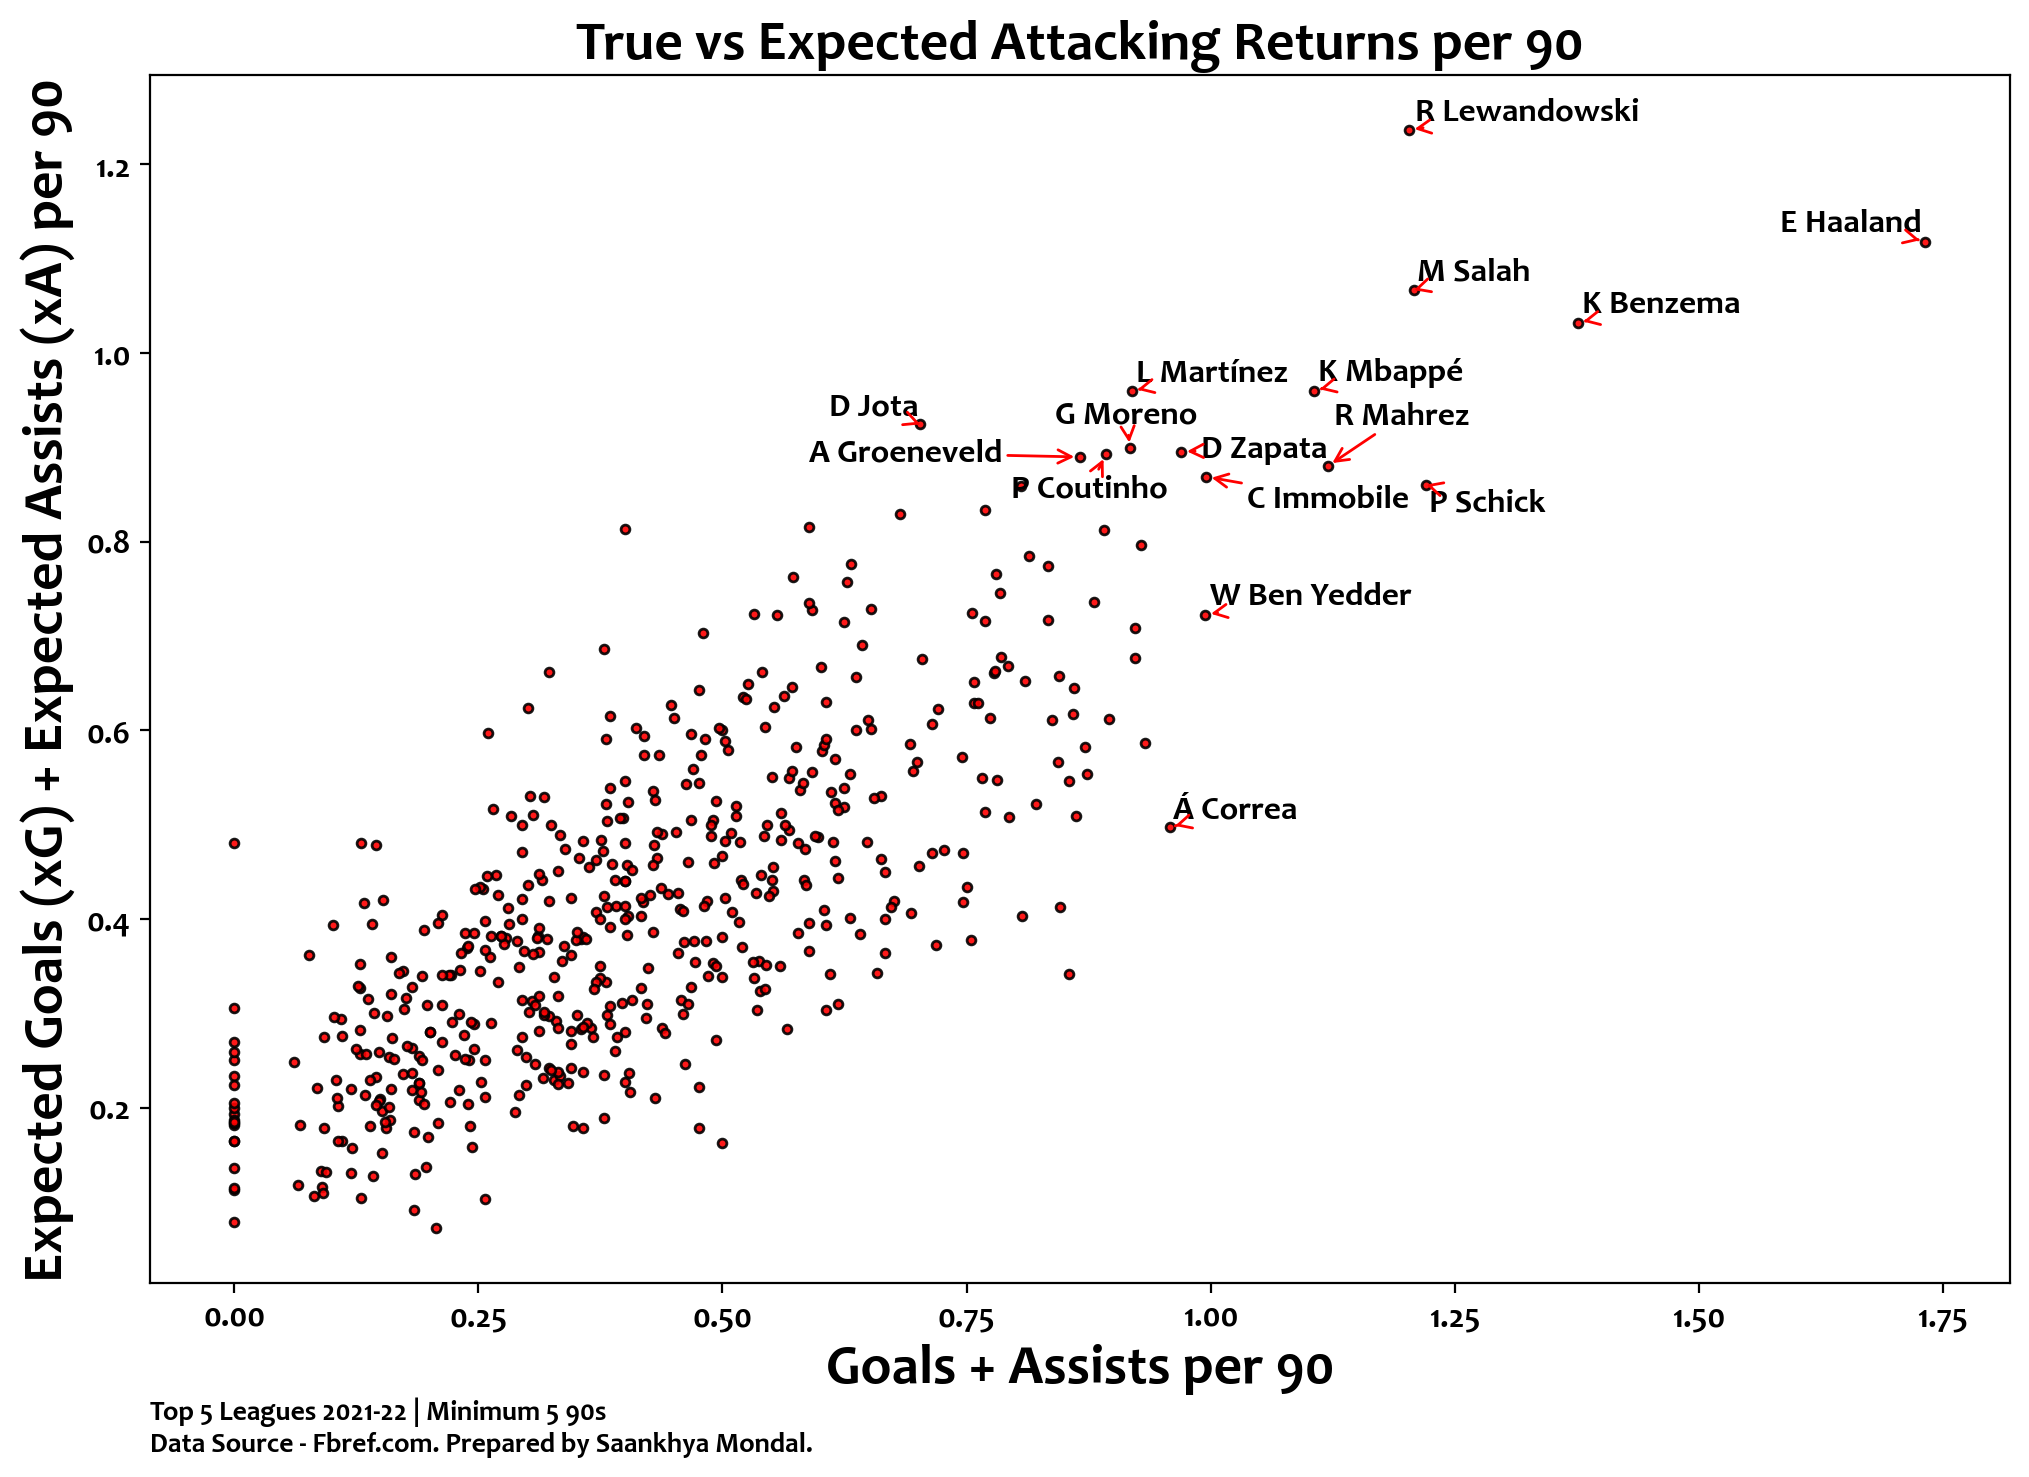

In [17]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data = data[['Player', '90s', 'Gls', 'xG', 'Ast', 'xA']]
data['Gp90'] = data['Gls']/data['90s']
data['Ap90'] = data['Ast']/data['90s']
data['xGp90'] = data['xG']/data['90s']
data['xAp90'] = data['xA']/data['90s']

data['G+Ap90'] = data['Gp90'] + data['Ap90']
data['xG+xAp90'] = data['xGp90'] + data['xAp90']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xG+xAp90'].quantile(0.980)
outlier_bottom = data['xG+xAp90'].quantile(0.01)
outlier_right = data['G+Ap90'].quantile(0.980)
outlier_left = data['G+Ap90'].quantile(0.01)

par_x = list(data['G+Ap90'].astype(float))
par_y = list(data['xG+xAp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Goals + Assists per 90', fontsize=20)
ax.set_ylabel('Expected Goals (xG) + Expected Assists (xA) per 90', fontsize=20)
ax.set_title('True vs Expected Attacking Returns per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [18]:
fig.savefig('Images/G+AvsxG+xAp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

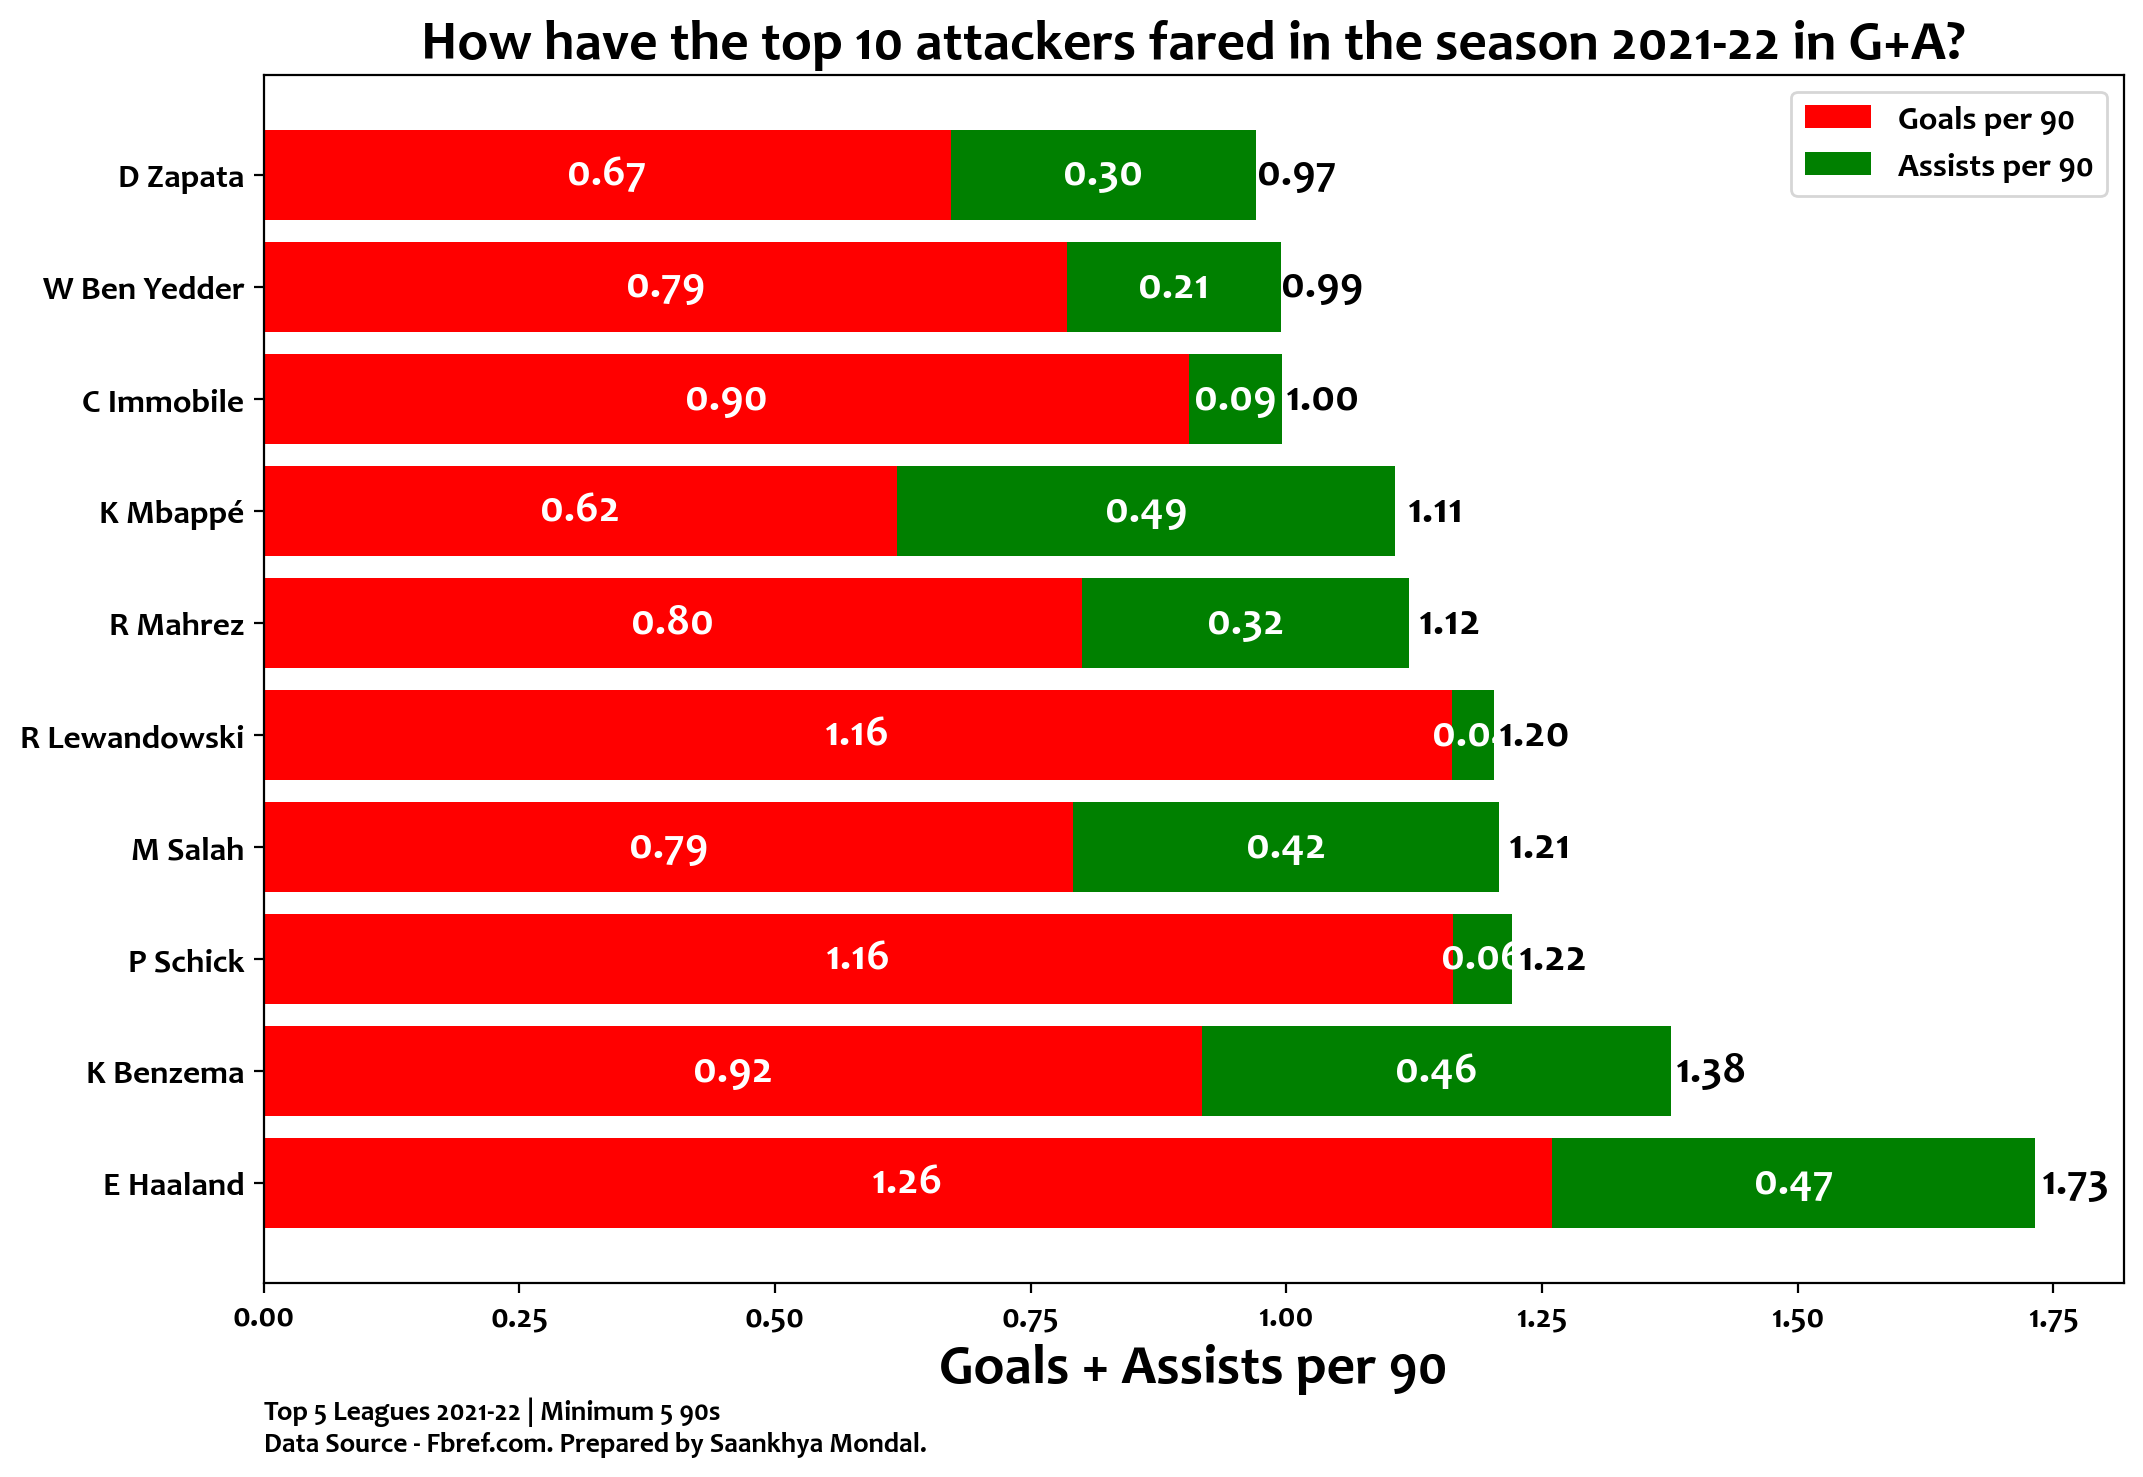

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
d = data.sort_values(by='G+Ap90', ascending=False)
d = d.iloc[:10]
fig.set_dpi(200)
p1 = list(d['Gp90'])
p2 = list(d['Ap90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Goals per 90', 'Assists per 90'])
plt.xlabel('Goals + Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [20]:
fig.savefig('Images/G+Ap90_top10.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

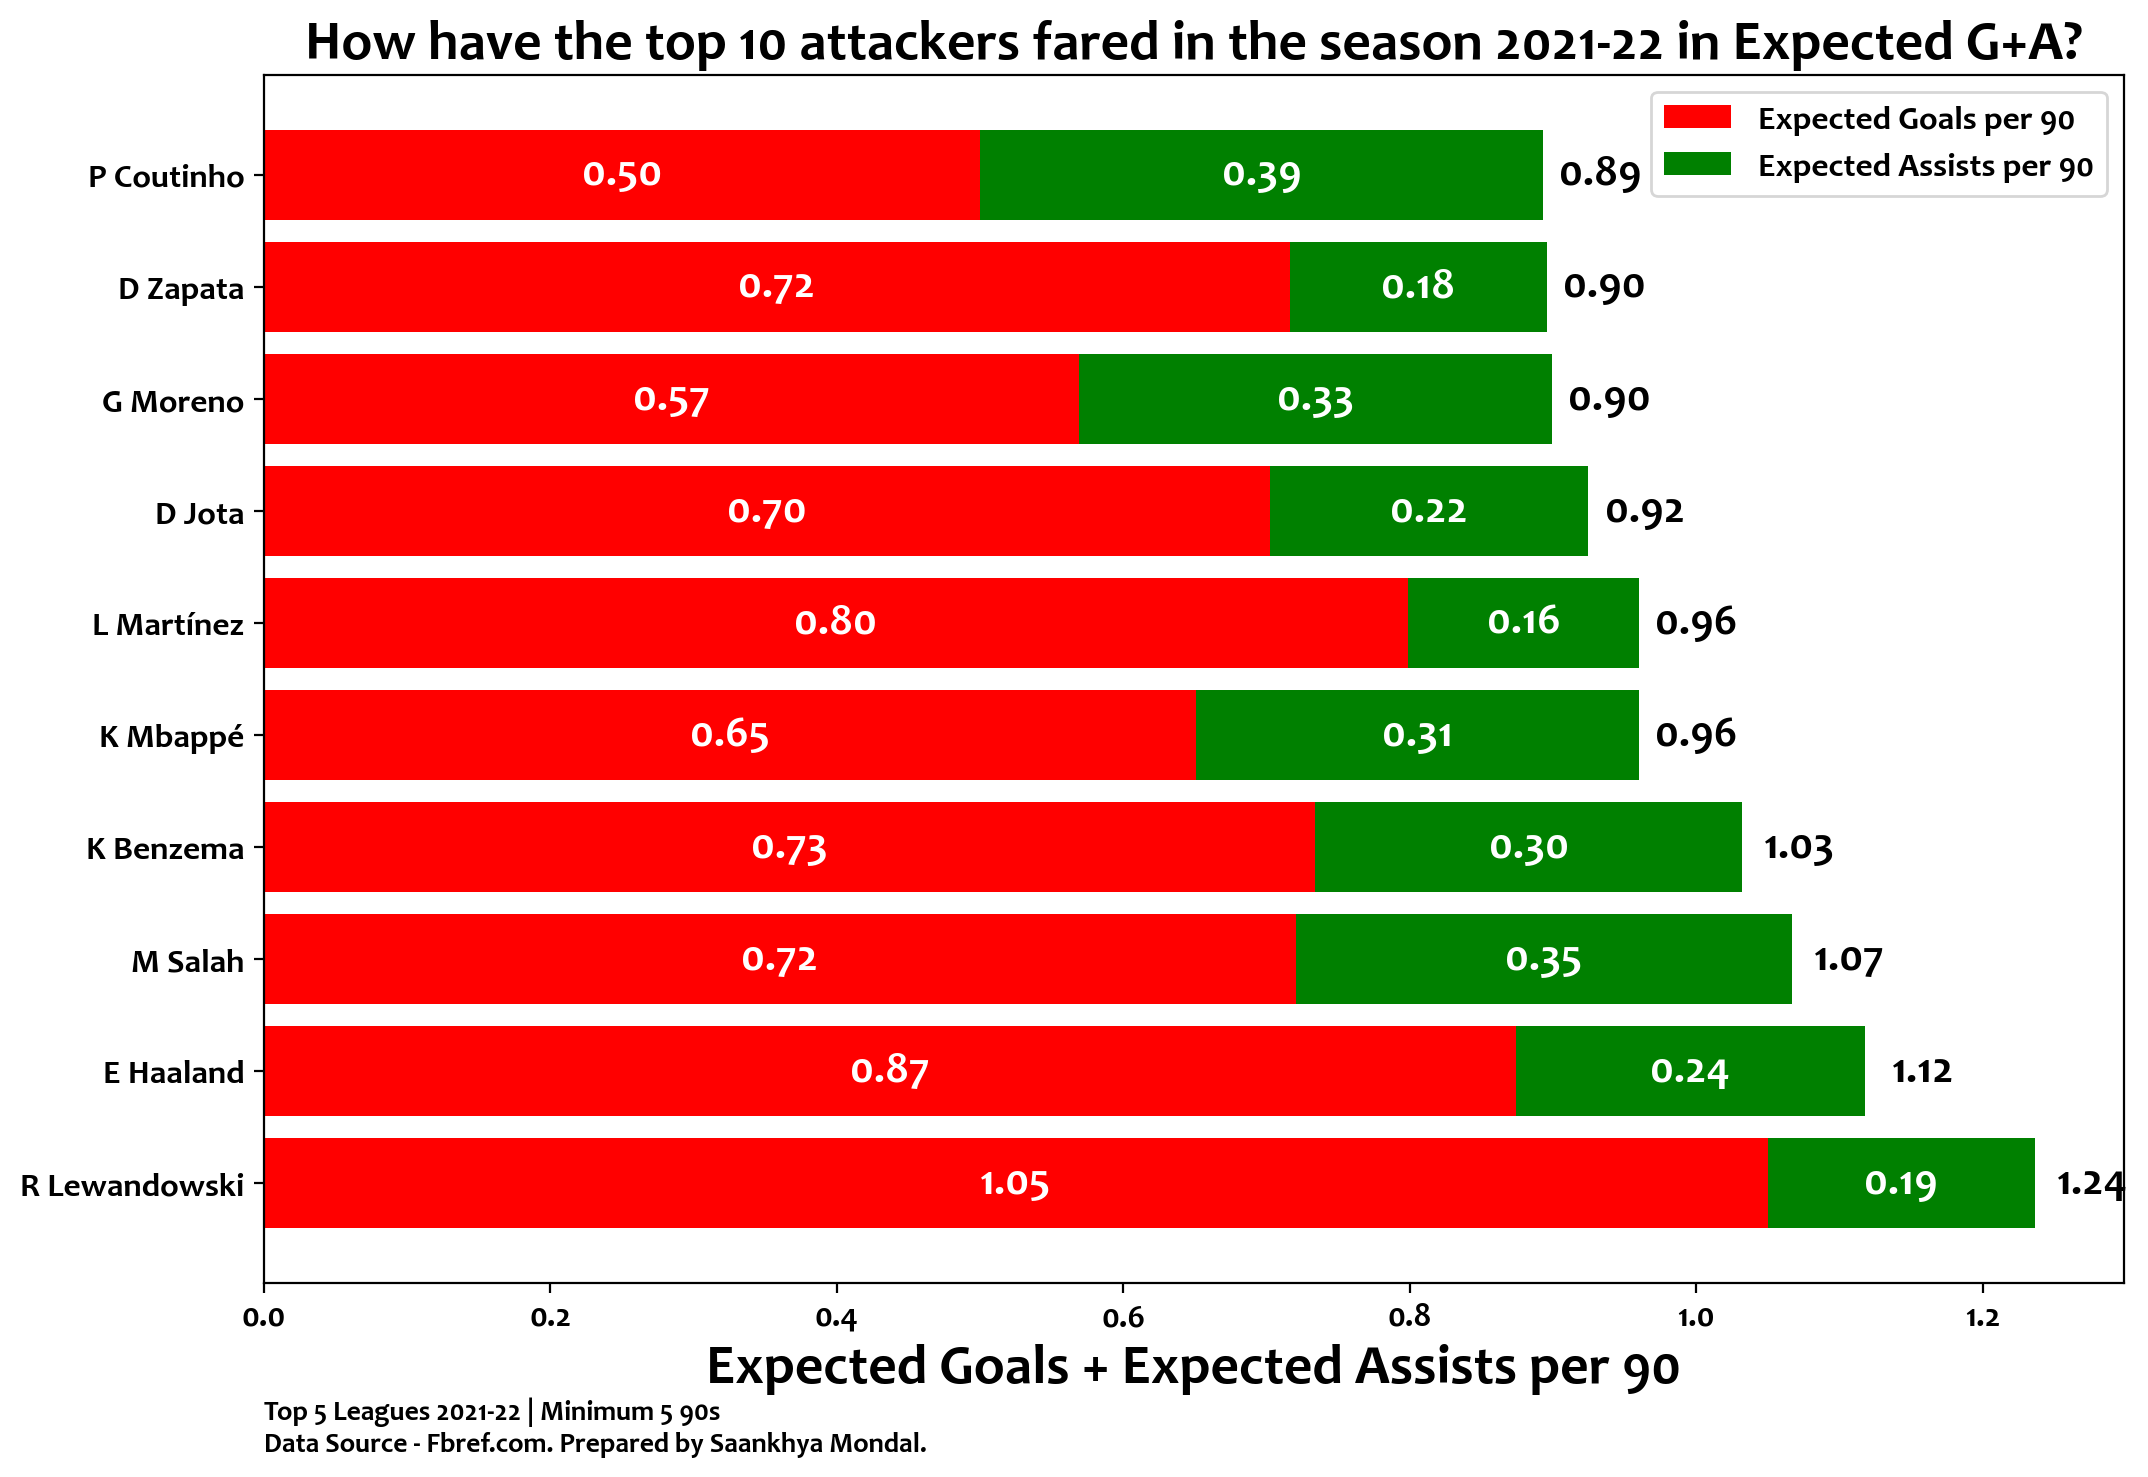

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
d = data.sort_values(by='xG+xAp90', ascending=False)
d = d.iloc[:10]
p1 = list(d['xGp90'])
p2 = list(d['xAp90'])
players = list(d['Player'])
color = plt.cm.rainbow(np.linspace(0.9, 1, 10))
for i in range(10):
    players[i] = players[i][0] + ' ' + ' '.join(players[i].split()[1:])
plt.barh(players, p1, color='red')
plt.barh(players, p2, color='green', left=p1)

for p in range(20):
    width, height = ax.patches[p].get_width(), ax.patches[p].get_height()
    x, y = ax.patches[p].get_xy()
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f}'.format(width),
            horizontalalignment='center', 
            verticalalignment='center',
            color='white',
            fontsize=16)
    if p >= 10:
        cc = width + ax.patches[p-10].get_width()
        ax.text(cc + 0.04, 
                y+height/2, 
                '{:.2f}'.format(cc),
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontsize=16)
plt.legend(['Expected Goals per 90', 'Expected Assists per 90'])
plt.xlabel('Expected Goals + Expected Assists per 90', fontsize=20)
plt.title('How have the top 10 attackers fared in the season 2021-22 in Expected G+A?', fontsize=20)
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [22]:
fig.savefig('Images/xG+xAp90_top10.png', dpi=400, bbox_inches='tight')

In [23]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 4 to 2789
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      916 non-null    object
 1   Nation      915 non-null    object
 2   Pos         916 non-null    object
 3   Squad       916 non-null    object
 4   Comp        916 non-null    object
 5   Age         915 non-null    object
 6   Born        915 non-null    object
 7   90s         916 non-null    object
 8   Gls         916 non-null    object
 9   Sh_x        916 non-null    object
 10  SoT         916 non-null    object
 11  SoT%        828 non-null    object
 12  Sh/90       916 non-null    object
 13  SoT/90      916 non-null    object
 14  G/Sh        828 non-null    object
 15  G/SoT       721 non-null    object
 16  Dist        828 non-null    object
 17  FK          916 non-null    object
 18  PK          916 non-null    object
 19  PKatt       916 non-null    object
 20  xG       

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

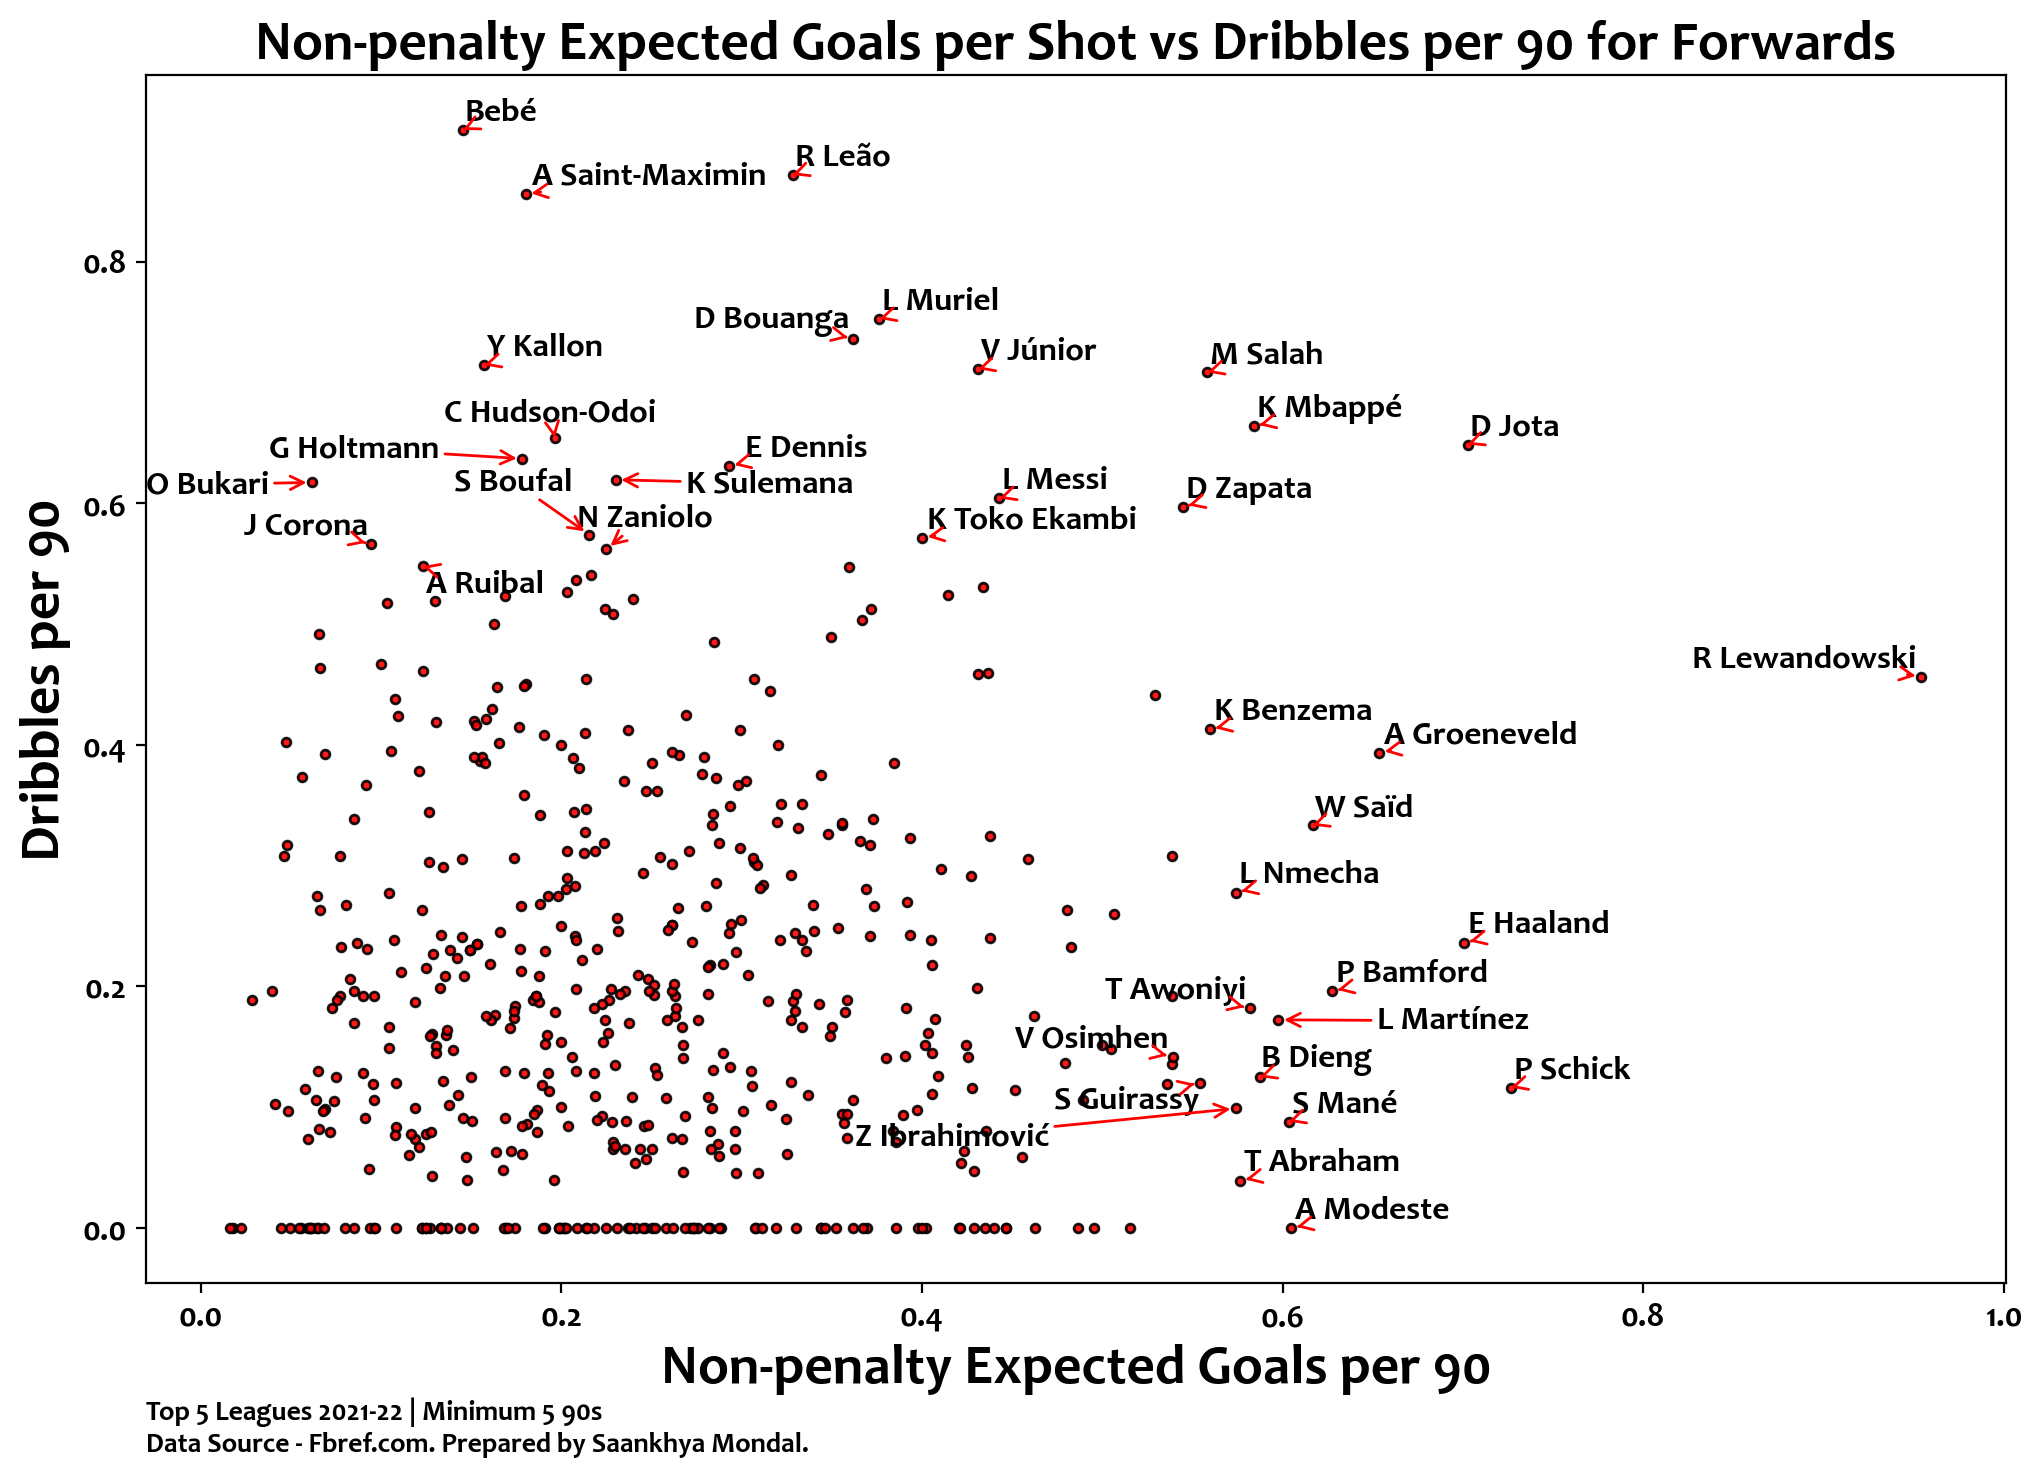

In [24]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['npxGp90'] = data['npxG']/data['90s']
data['Dp90'] = data['Drib']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['Dp90'].quantile(0.960)
outlier_bottom = data['Dp90'].quantile(0.03)
outlier_right = data['npxGp90'].quantile(0.960)
outlier_left = data['npxGp90'].quantile(0.03)

par_x = list(data['npxGp90'].astype(float))
par_y = list(data['Dp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Non-penalty Expected Goals per 90', fontsize=20)
ax.set_ylabel('Dribbles per 90', fontsize=20)
ax.set_title('Non-penalty Expected Goals per Shot vs Dribbles per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

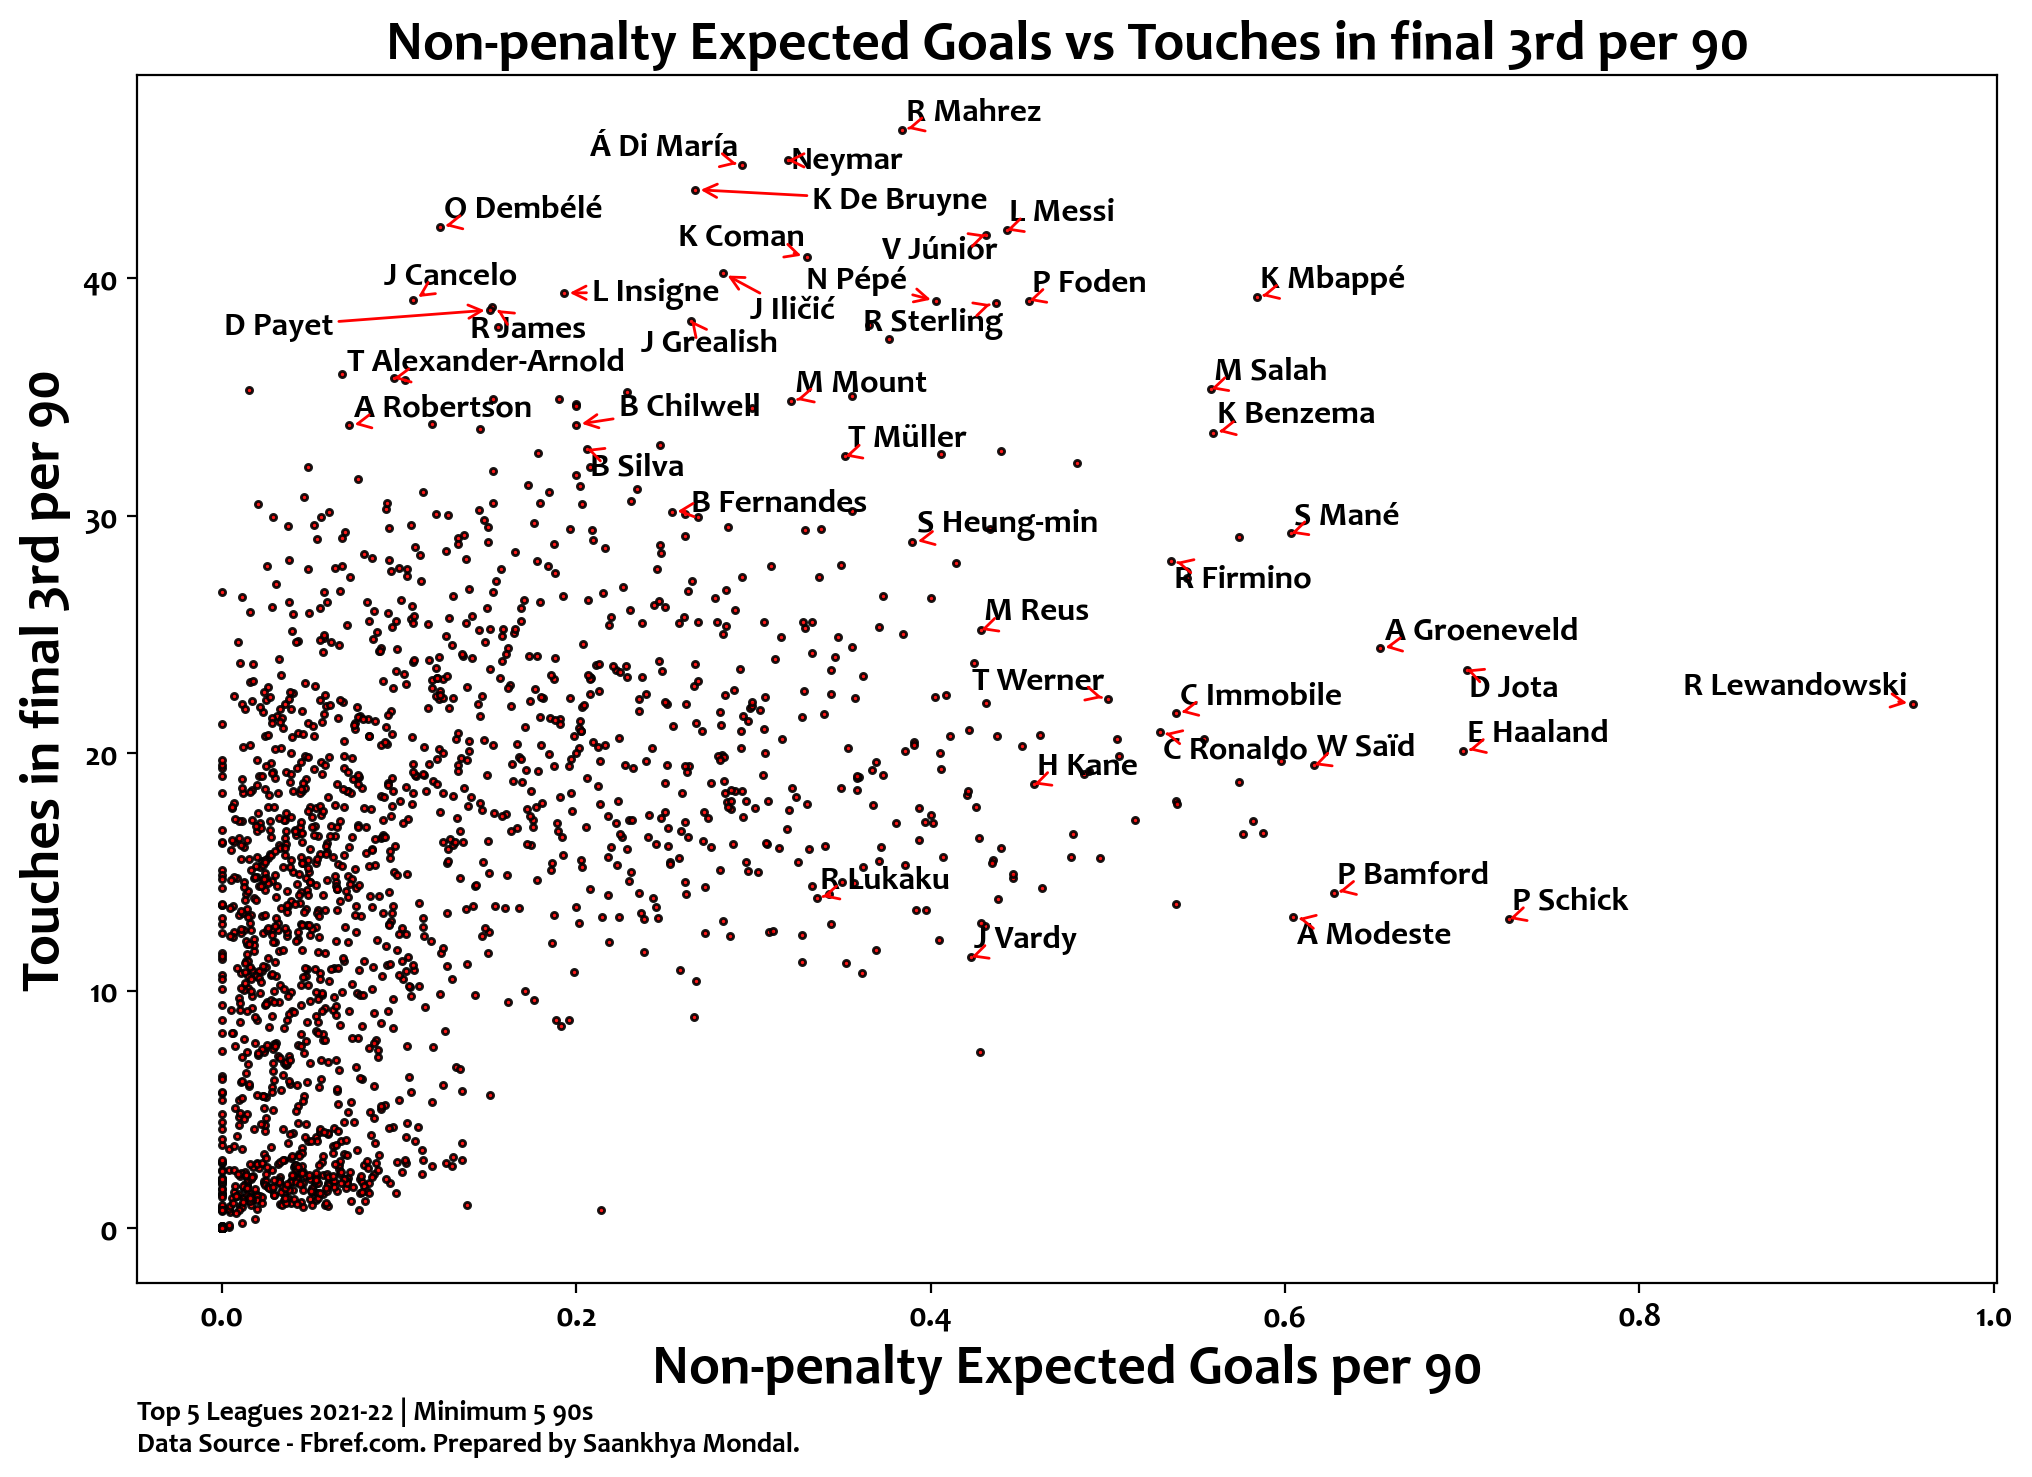

In [13]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
players = ['Trent', 'Benzema', 'Firmino', 'Thomas Müller', 'Lukaku', 'Ronaldo', 'Salah', 'Werner', 'Sadio', 'Vardy', 'Kane', 'Heung-min', 'Immobile', 'Robertson', 'Chilwell', 'Reus', 'Mount', 'Bruno', 'Bernardo Silva']
data['npxGp90'] = data['npxG']/data['90s']
data['Tp90'] = data['Att 3rd']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['Tp90'].quantile(0.990)
outlier_bottom = data['Tp90'].quantile(0.01)
outlier_right = data['npxGp90'].quantile(0.995)
outlier_left = data['npxGp90'].quantile(0.01)

def check_name_present(name):
    for i in players:
        if i in name:
            return True
    return False

par_x = list(data['npxGp90'].astype(float))
par_y = list(data['Tp90'].astype(float))
scatter = plt.scatter(par_x, par_y, s=5, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Non-penalty Expected Goals per 90', fontsize=20)
ax.set_ylabel('Touches in final 3rd per 90', fontsize=20)
ax.set_title('Non-penalty Expected Goals vs Touches in final 3rd per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/npxGp90vsTf3p90.png', dpi=400, bbox_inches='tight')